In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *

In [3]:
PATH = 'data/hackerearth-zs/'

In [4]:
import pandas as pd

In [5]:
df_given = pd.read_csv(PATH+'yds_train2018.csv',low_memory=False)

In [6]:
df_given_expenses = pd.read_csv(PATH+'promotional_expense_1.csv',low_memory=False)

In [7]:
df_given.head()

,S_No,Year,Month,Week,Merchant_ID,Product_ID,Country,Sales
0,1,2013,1,1,ar00001,1,Argentina,157500.0
1,2,2013,1,1,ar00003,1,Argentina,39375.0
2,3,2013,1,1,ar00004,1,Argentina,15750.0
3,4,2013,1,1,ar00007,1,Argentina,47250.0
4,5,2013,1,1,ar00008,1,Argentina,283500.0


In [8]:
df_given_expenses.head()

,Year,Month,Country,Product_ID,Expense_Price
0,2013,1,Argentina,1,14749.307
1,2013,1,Argentina,2,1329.374
2,2013,1,Belgium,2,249.590
3,2013,1,Columbia,1,1893.122
4,2013,1,Columbia,2,1436.726


In [9]:
df_given.drop(['S_No'],inplace=True,axis=1)

In [10]:
df_given.drop(['Week'],inplace=True,axis=1)

In [11]:
df_given.drop(['Merchant_ID'],inplace=True,axis=1)

In [12]:
df_given.head()

,Year,Month,Product_ID,Country,Sales
0,2013,1,1,Argentina,157500.0
1,2013,1,1,Argentina,39375.0
2,2013,1,1,Argentina,15750.0
3,2013,1,1,Argentina,47250.0
4,2013,1,1,Argentina,283500.0


In [13]:
df_experi = df_given.groupby(['Year','Month','Product_ID','Country']).sum().reset_index()

In [14]:
df_experi.head()

,Year,Month,Product_ID,Country,Sales
0,2013,1,1,Argentina,34346025.00
1,2013,1,1,Columbia,3947356.31
2,2013,1,2,Argentina,2751851.48
3,2013,1,2,Belgium,314850.13
4,2013,1,2,Columbia,2885137.06


In [15]:
len(df_experi)

388

In [16]:
df_experi.to_csv(PATH+'temp2.csv')

In [17]:
df_joined = pd.merge(df_experi,df_given_expenses,how='left',left_on=['Year','Month','Country','Product_ID'],right_on=['Year','Month','Country','Product_ID'])

In [18]:
df_joined.head()

,Year,Month,Product_ID,Country,Sales,Expense_Price
0,2013,1,1,Argentina,34346025.00,14749.307
1,2013,1,1,Columbia,3947356.31,1893.122
2,2013,1,2,Argentina,2751851.48,1329.374
3,2013,1,2,Belgium,314850.13,249.590
4,2013,1,2,Columbia,2885137.06,1436.726


In [19]:
len(df_joined)

388

In [20]:
df_joined.replace(to_replace=0,value=0.1,inplace=True)

In [21]:
df_joined = df_joined.fillna(0)

In [22]:
df_joined.to_csv(PATH+'final_training_2.csv')

In [23]:
df_joined.head()

,Year,Month,Product_ID,Country,Sales,Expense_Price
0,2013,1,1,Argentina,34346025.00,14749.307
1,2013,1,1,Columbia,3947356.31,1893.122
2,2013,1,2,Argentina,2751851.48,1329.374
3,2013,1,2,Belgium,314850.13,249.590
4,2013,1,2,Columbia,2885137.06,1436.726


In [24]:
cat_vars=['Product_ID','Country','Year']

In [25]:
cont_vars = ['Month','Sales','Expense_Price']

In [26]:
for v in cat_vars:
    df_joined[v] = df_joined[v].astype('category').cat.as_ordered()

In [27]:
for v in cont_vars:
    df_joined[v] = df_joined[v].astype('float32')

In [28]:
n = len(df_joined); n

388

In [29]:
idxs = get_cv_idxs(n, val_pct=30/n)


In [30]:
idxs

array([271,  46, 167,  42, 349, 181, 153,  33, 116, 148, 376, 284, 104,  57, 198, 114,  15, 218,  84,   0,
       384, 152,  73, 168, 360,  77, 318, 342,  76, 299])

In [31]:
len(idxs)

30

In [32]:
df, y,nas, mapper = proc_df(df_joined, 'Sales', do_scale=True)

In [33]:
np.max(y)

199093890.0

In [34]:
df.head()

,Year,Month,Product_ID,Country,Expense_Price
0,1,-1.509314,1,1,0.451515
1,1,-1.509314,1,3,-0.357289
2,1,-1.509314,2,1,-0.392755
3,1,-1.509314,2,2,-0.460686
4,1,-1.509314,2,3,-0.386002


In [35]:
ylog = np.log(y)

In [36]:
for c in cat_vars:
    df[c]= df[c].astype('category').cat.as_ordered()

In [37]:
for c in cat_vars:
    print(df[c].dtype)

category
category
category


In [38]:
df_test = pd.read_csv(PATH+'yds_test2018.csv',low_memory=False)

df_test.head()

df_test.drop(['S_No'],inplace=True,axis=1)



df_test_joined = pd.merge(df_test,df_given_expenses,how='left',left_on=['Year','Month','Country','Product_ID'],right_on=['Year','Month','Country','Product_ID'])

df_test_joined.head()





,Year,Month,Product_ID,Country,Sales,Expense_Price
0,2016,4,1,Argentina,27234916.0,8214.875
1,2016,5,1,Argentina,31695238.0,10777.878
2,2016,6,1,Argentina,31048838.0,10320.673
3,2016,7,1,Argentina,26507074.0,7377.587
4,2016,8,1,Argentina,30479966.0,9805.705


In [39]:
df_test_joined = df_test_joined.fillna(0)

for c in cat_vars:
    df_test_joined[c]= df_test_joined[c].astype('category').cat.as_ordered()

df_test, _, nas, mapper = proc_df(df_test_joined, 'Sales', do_scale=True,
                                  mapper=mapper, na_dict=nas)

df_test.head()

,Year,Month,Product_ID,Country,Expense_Price
0,2,-0.647695,1,1,0.040423
1,2,-0.360489,1,1,0.201666
2,2,-0.073282,1,1,0.172902
3,2,0.213924,1,1,-0.012252
4,2,0.501131,1,1,0.140505


In [40]:
md = ColumnarModelData.from_data_frame(PATH, idxs, df, ylog.astype(np.float32), cat_flds=cat_vars, bs=4,test_df=df_test, is_reg=True)

In [41]:
cat_sz = [(c, len(df[c].cat.categories)+1) for c in cat_vars]

In [42]:
cat_sz

[('Product_ID', 6), ('Country', 7), ('Year', 5)]

In [43]:
emb_szs = [(c, max(20, (c+1)//2)) for _,c in cat_sz]

In [44]:
emb_szs

[(6, 20), (7, 20), (5, 20)]

In [45]:
max_y = np.max(ylog)
min_y = np.min(ylog)
y_range = (9.0, max_y*1.2)
min_y


10.019473

In [46]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [600,300], [0.001,0.01], y_range=y_range)


In [47]:
len(df.columns)-len(cat_vars)

2

In [48]:
m.lr_find()

 79%|████████████████████████████████████████████████████████               | 71/90 [00:01<00:00, 59.46it/s, loss=13.2]


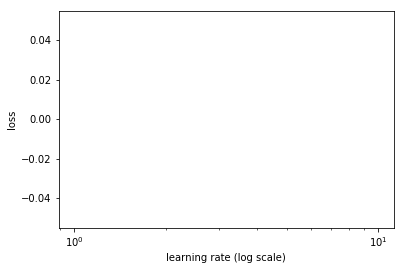

In [49]:
m.sched.plot(100)

In [50]:
lr=0.01

In [51]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [52]:
lr = 0.01

In [53]:
m.fit(lr, 10,metrics=[mean_absolute_percentage_error])

epoch      trn_loss   val_loss   mean_absolute_percentage_error                                                        
    0      1.169465   0.259542   2.577839  
    1      0.534428   0.226629   2.798092                                                                              
    2      0.269932   0.08172    1.579884                                                                              
    3      0.253418   0.467733   2.874723                                                                              
    4      0.294592   0.124434   1.951441                                                                              
    5      0.331379   0.118144   2.033184                                                                              
    6      0.232822   0.183285   2.362573                                                                              
    7      0.253519   0.173278   1.843352                                                                           

[array([0.18496]), 2.6022877544164658]

In [54]:
lr=0.001

In [55]:
m.fit(lr,10,metrics=[mean_absolute_percentage_error])

epoch      trn_loss   val_loss   mean_absolute_percentage_error                                                        
    0      0.127977   0.020512   0.830142  
    1      0.122364   0.027044   0.803696                                                                              
    2      0.102014   0.053795   1.289316                                                                              
    3      0.102324   0.030329   0.900637                                                                              
    4      0.092001   0.032497   0.941554                                                                              
    5      0.076693   0.02415    0.846703                                                                              
    6      0.071319   0.036025   0.946347                                                                              
    7      0.077486   0.023949   0.735308                                                                           

[array([0.01561]), 0.6124486401677132]

In [56]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [57]:
lr=0.0001

In [58]:
m.fit(lr,10,metrics=[mean_absolute_percentage_error])

epoch      trn_loss   val_loss   mean_absolute_percentage_error                                                        
    0      0.051248   0.018938   0.667299  
    1      0.058209   0.018369   0.650493                                                                              
    2      0.064219   0.018233   0.655539                                                                              
    3      0.060124   0.021989   0.719757                                                                              
    4      0.053535   0.020266   0.69932                                                                               
    5      0.050829   0.018169   0.642779                                                                              
    6      0.057044   0.01876    0.65317                                                                               
    7      0.067081   0.017789   0.62231                                                                            

[array([0.02131]), 0.6942614447325468]

In [59]:
m.fit(lr,1000,metrics=[mean_absolute_percentage_error])

epoch      trn_loss   val_loss   mean_absolute_percentage_error                                                        
    0      0.046115   0.017961   0.626462  
    1      0.047358   0.018708   0.657647                                                                              
    2      0.060093   0.018914   0.657432                                                                              
    3      0.050515   0.016771   0.616742                                                                              
    4      0.057555   0.017508   0.628338                                                                              
    5      0.046664   0.017201   0.609996                                                                              
    6      0.051901   0.017043   0.625069                                                                              
    7      0.040696   0.01766    0.624576                                                                           

    67     0.040069   0.018867   0.704689                                                                              
    68     0.049869   0.019167   0.695856                                                                              
    69     0.041657   0.018194   0.689206                                                                              
    70     0.03623    0.017613   0.664963                                                                              
    71     0.03645    0.016434   0.667772                                                                              
    72     0.043767   0.015021   0.618546                                                                              
    73     0.042395   0.015474   0.615967                                                                              
    74     0.033536   0.016914   0.663186                                                                              
    75     0.045284   0.019453   0.72747

KeyboardInterrupt: 

In [ ]:
x,y=m.predict_with_targs()

In [ ]:
mean_absolute_percentage_error(x,y)

In [ ]:
pred_test=m.predict(True)

In [ ]:
pred_test = np.exp(pred_test)

In [ ]:
df_results = df_test

In [ ]:
df_results['Sales']=pred_test

In [ ]:
df_results.head()

In [ ]:
df_results.head()

In [ ]:
df_results.to_csv(PATH+'results_2.csv')

In [ ]:
final_sales_result =df_results['Sales']